In [7]:
# Code written by Zoe de Beurs. Tutorial modified from https://github.com/evertrol/mpyfit 

import numpy
import mpyfit
import matplotlib.pylab as plt

In [2]:
# Define the actual function
def func(x, p):
    return p[0] + p[1] * numpy.sin(p[2]*x - p[3])

In [3]:
# A simple minimization function:
def least(p, args):
    x, y = args
    return func(x, p) - y

In [26]:
# Generate data
p = [1, 1.5, 0.2, 0.5]
x = numpy.linspace(-20, 10, 30)
y = func(x, p)
# Add some noise
y += numpy.random.normal(0, 0.05, y.shape)

# choose starting values for parameter you are trying to fit
pstart = [1, 1, 0.1, 1]

# choose step sizes for those parameters
parinfo = [{'fixed': False, 'step': 1e-3},
           {'fixed': False, 'step': 1e-2},
           {'fixed': False, 'step': 1e-3},
           {'fixed': False, 'step': 1e-2}]

pfit, results = mpyfit.fit(least, pstart, (x, y), parinfo)

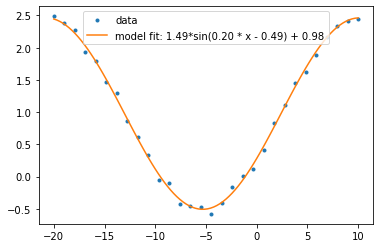

In [27]:
# plot the resulting fit

# generate closely spaced x_values with the same xmin and xmax as the simulated data
x_closely_spaced = numpy.linspace(-20, 10, 100)

# plot simulated data
plt.plot(x, y, ".", label="data")

# plot your fit
plt.plot(x_closely_spaced, func(x_closely_spaced, pfit), 
         label="model fit: %.2f*sin(%.2f * x - %.2f) + %.2f"%(pfit[1], pfit[2], pfit[3], pfit[0]))
plt.legend()

In [5]:
# print your fit
print([round(p, 1) for p in pfit]) 

[1.0, 1.5, 0.2, 0.5]


In [19]:
pfit

array([0.98845399, 1.46498872, 0.20137873, 0.47154703])